# The Greeks

The price of an option as the market changes is very difficult to predict. This results from the fact that price does not always move in correspondence with the price of the underlying asset. As such, it is of major interest to understand factors that contribute to the movement in price of an option, and what effect they have. Most option traders
therefore turn to the Greeks which provide a means in measuring the sensitivity of an option price
by quantifying the factors.

## Review: The Black-Scholes Formula

The value of a **call option** for a non-dividend-paying underlying stock in terms of the Black–Scholes parameters is,

$$C\left(S_{t},t\right) = S_{t} N\left(\mathrm{d}_{1}\right) -  K\mathrm{e}^{-r\left(T-t\right)} N\left(\mathrm{d}_{2}\right)$$

and the price of a corresponding **put option** is,

$$P(S_{t},t) = K \mathrm{e}^{-r(T-t)} N(-\mathrm{d}_2)-S_{t} N(-\mathrm{d}_1)$$

where,

$\space \space \space \space {\begin{aligned}&N(x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]\\&\mathrm{d}_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\log \left({\frac {S_{t}}{K}}\right)+\left(r+{\frac {\sigma ^{2}}{2}}\right)(T-t)\right]\\&\mathrm{d}_{2}=\mathrm{d}_{1}-\sigma {\sqrt {T-t}}\end{aligned}}$

## The Greeks

The **Greeks** refer to the partial derivatives of derivative securities with respect to the model parameters. Considered vital tools in risk management, their quantities represent the sensitivity of the price of derivatives such as options to a change in underlying parameters on which the value of an instrument or portfolio of financial instruments is dependent.

### Delta

The **Delta**, $\Delta$, of an option is the partial derivative of the option price with respect to the price of the underlying security, $\Delta = \frac{\partial V}{\partial S}$.

The Delta measures the sensitivity of the option price to the price of the underlying security [**[1]**](https://www.investopedia.com/terms/g/greeks.asp).

The Delta of a **European call option**, $C$, is,
<br><br>
$$\Delta = \frac{\partial C}{\partial S} =  N\left(\mathrm{d}_{1}\right)$$

$N\left(\mathrm{d}_{1}\right)$ is the CDF of a standard normal random variable.

<div class="alert alert-warning">
For,
<br>
$\space \space \space \space S_t \in [60, 100]$
<br>
$\space \space \space \space K = 80$
<br>
$\space \space \space \space T = 1$
<br>
$\space \space \space \space t = 0$   
<br>
$\space \space \space \space r = 0.02$
<br>
$\space \space \space \space \sigma = 0.05$
</div>

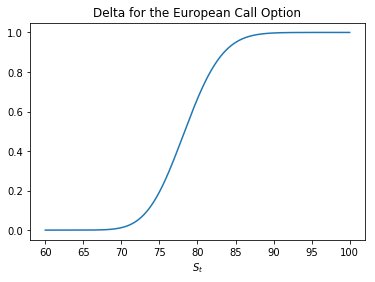

In [1]:
# Scientific libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Delta of a call option
def CallDelta(d_1):
    return norm.cdf(d_1)

# Parameters
S_t = np.linspace(60, 100, 1000)
K = 80
T = 1
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([(1/(sigma*np.sqrt(T-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T-t))])

# Visualization
plt.plot(S_t, CallDelta(d_1).reshape(1000))
plt.xlabel(r"$S_t$")
plt.title('Delta for the European Call Option')
plt.show()

the above plot shows the Delta of a European call option when time-to-maturity, $T$, equals one. Thus, the Delta of a European call option when time-to-maturity varies will be,

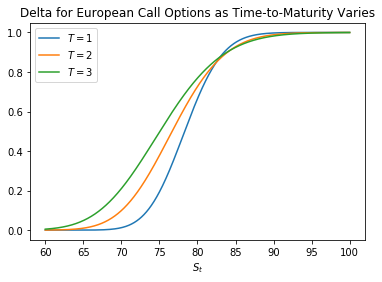

In [2]:
S_t = np.linspace(60, 100, 1000)
K = 80
T = np.array([1, 2, 3])
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([[(1/(sigma*np.sqrt(T[0]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[0]-t))],
               [(1/(sigma*np.sqrt(T[1]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[1]-t))],
               [(1/(sigma*np.sqrt(T[2]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[2]-t))]])

plt.plot(S_t, CallDelta(d_1[0]).reshape(1000), label=r'$T = 1$')
plt.plot(S_t, CallDelta(d_1[1]).reshape(1000), label=r'$T = 2$')
plt.plot(S_t, CallDelta(d_1[2]).reshape(1000), label=r'$T = 3$')
plt.xlabel(r"$S_t$")
plt.title('Delta for European Call Options as Time-to-Maturity Varies')
plt.legend()
plt.show()

similarly, the Delta of a **European put option**, $P$, is,
<br><br>
$$\Delta = \frac{\partial P}{\partial S} =  N\left(\mathrm{d}_{1}\right) - 1$$

for the same parametric values we used earlier, we get,

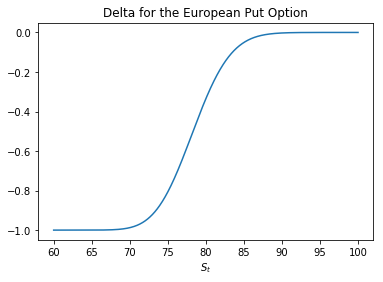

In [3]:
# Delta of a put option
def PutDelta(d_1):
    return norm.cdf(d_1) - 1

S_t = np.linspace(60, 100, 1000)
K = 80
T = 1
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([(1/(sigma*np.sqrt(T-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T-t))])

plt.plot(S_t, PutDelta(d_1).reshape(1000))
plt.xlabel(r"$S_t$")
plt.title('Delta for the European Put Option')
plt.show()

the above plot shows the Delta of a European put option when time-to-maturity, $T$, equals one. Thus, the Delta of a European put option when time-to-maturity varies will be,

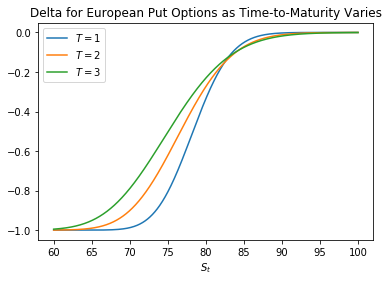

In [4]:
S_t = np.linspace(60, 100, 1000)
K = 80
T = np.array([1, 2, 3])
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([[(1/(sigma*np.sqrt(T[0]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[0]-t))],
               [(1/(sigma*np.sqrt(T[1]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[1]-t))],
               [(1/(sigma*np.sqrt(T[2]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[2]-t))]])

plt.plot(S_t, PutDelta(d_1[0]).reshape(1000), label=r'$T = 1$')
plt.plot(S_t, PutDelta(d_1[1]).reshape(1000), label=r'$T = 2$')
plt.plot(S_t, PutDelta(d_1[2]).reshape(1000), label=r'$T = 3$')
plt.xlabel(r"$S_t$")
plt.title('Delta for European Put Options as Time-to-Maturity Varies')
plt.legend()
plt.show()

when a the Delta of a call and a put option are plotted together we get as a result,

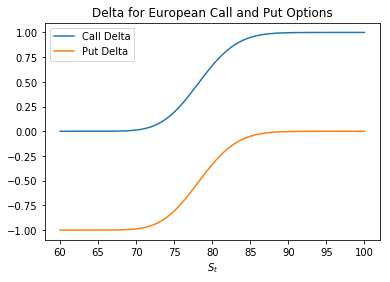

In [5]:
plt.plot(S_t, CallDelta(d_1[0]).reshape(1000), label = "Call Delta")
plt.plot(S_t, PutDelta(d_1[0]).reshape(1000), label = "Put Delta")
plt.xlabel(r"$S_t$")
plt.title('Delta for European Call and Put Options')
plt.legend()
plt.show()

### Vega

The **Vega**, ${\mathcal {V}}$, of an option is the partial derivative of the option price with respect to the volatility of the underlying security, ${\mathcal {V}} = \frac{\partial V}{\partial \sigma}$.

Vega measures sensitivity to volatility [**[2]**](https://www.investopedia.com/terms/g/greeks.asp).

The Vega of a **European call option**, $C$, is,
<br><br>
$$\mathcal{V} = \frac{\partial C}{\partial \sigma} =  S \sqrt{T - t} N'\left(\mathrm{d}_{1}\right)$$
<br>
$N'\left(\mathrm{d}_{1}\right)$ is the PDF of a standard normal random variable.

<div class="alert alert-warning">
For,
<br>
$\space \space \space \space S_t \in [60, 100]$
<br>
$\space \space \space \space K = 80$
<br>
$\space \space \space \space T \in [0, 3]$
<br>
$\space \space \space \space t = 0$   
<br>
$\space \space \space \space r = 0.02$
<br>
$\space \space \space \space \sigma = 0.05$
</div>

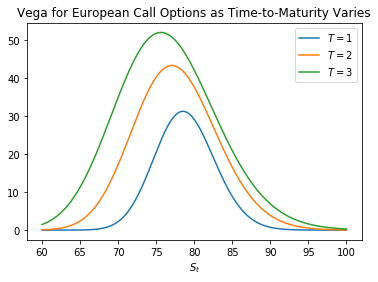

In [6]:
# Vega of a call option
def CallVega(S_t, T, t, d_1):
    return S_t*np.sqrt(T-t)*norm.pdf(d_1)

S_t = np.linspace(60, 100, 1000)
K = 80
T = np.array([1, 2, 3])
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([[(1/(sigma*np.sqrt(T[0]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[0]-t))],
               [(1/(sigma*np.sqrt(T[1]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[1]-t))],
               [(1/(sigma*np.sqrt(T[2]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[2]-t))]])

plt.plot(S_t, CallVega(S_t, T[0], t, d_1[0]).reshape(1000), label=r'$T = 1$')
plt.plot(S_t, CallVega(S_t, T[1], t, d_1[1]).reshape(1000), label=r'$T = 2$')
plt.plot(S_t, CallVega(S_t, T[2], t, d_1[2]).reshape(1000), label=r'$T = 3$')
plt.xlabel(r"$S_t$")
plt.title('Vega for European Call Options as Time-to-Maturity Varies')
plt.legend()
plt.show()

### Gamma

The **Gamma**, $\Gamma$, of an option is the partial derivative of the option’s delta with respect to the price of the underlying security.

Gamma measures the sensitivity of the option delta to the price of the underlying security [**[3]**](https://www.investopedia.com/terms/g/greeks.asp).

The Gamma of a **European call option**, $C$, is,
<br><br>
$$\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 C}{\partial S^2} = \frac{N'(d_{1})}{S\sigma\sqrt{T}}$$
<br>
$N'\left(\mathrm{d}_{1}\right)$ is the PDF of a standard normal random variable.

<div class="alert alert-warning">
For,
<br>
$\space \space \space \space S_t \in [60, 100]$
<br>
$\space \space \space \space K = 80$
<br>
$\space \space \space \space T \in [0, 3]$
<br>
$\space \space \space \space t = 0$   
<br>
$\space \space \space \space r = 0.02$
<br>
$\space \space \space \space \sigma = 0.05$
</div>

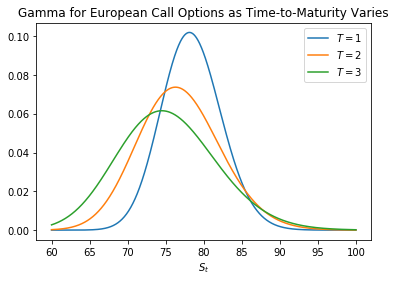

In [7]:
# Gamma of a call option
def CallGamma(S_t, T, t, sigma, d_1):
    return norm.pdf(d_1)/(S_t*sigma*np.sqrt(T))

S_t = np.linspace(60, 100, 1000)
K = 80
T = np.array([1, 2, 3])
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([[(1/(sigma*np.sqrt(T[0]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[0]-t))],
               [(1/(sigma*np.sqrt(T[1]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[1]-t))],
               [(1/(sigma*np.sqrt(T[2]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[2]-t))]])

plt.plot(S_t, CallGamma(S_t, T[0], t, sigma, d_1[0]).reshape(1000), label=r'$T = 1$')
plt.plot(S_t, CallGamma(S_t, T[1], t, sigma, d_1[1]).reshape(1000), label=r'$T = 2$')
plt.plot(S_t, CallGamma(S_t, T[2], t, sigma, d_1[2]).reshape(1000), label=r'$T = 3$')
plt.xlabel(r"$S_t$")
plt.title('Gamma for European Call Options as Time-to-Maturity Varies')
plt.legend()
plt.show()

Delta, Vega, and Gamma are some of many **risk measures**, other **hedge parameters** are,

$\space \space \space \space$ **Theta**, $\Theta$, which measures the sensitivity of the value of the derivative to the passage of time.

$$\Theta = -\frac{\partial V}{\partial \tau}$$

$\space \space \space \space$ **Rho**, $\rho$, which measures sensitivity to the interest rate,

$$\rho = \frac{\partial V}{\partial r}$$

$\space \space \space \space$ **Lambda**, $\lambda$, which is the percentage change in option value per percentage change in the underlying price,

$$\lambda = {\frac {\partial V}{\partial S}}\times {\frac {S}{V}}$$

## Bibliography

- **[1]** https://www.investopedia.com/terms/g/greeks.asp
- **[2]** https://www.investopedia.com/terms/g/greeks.asp
- **[3]** https://www.investopedia.com/terms/g/greeks.asp